# CMSC 197 Machine Learning: HW 2
Submitted by: Trixelle Johanna Juan Tong

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

Top 10 Directors with most movies directed


,director_name,num_movies
0,Steven Spielberg,26
1,Woody Allen,22
2,Clint Eastwood,20
3,Martin Scorsese,20
4,Ridley Scott,17
5,Steven Soderbergh,16
6,Spike Lee,16
7,Tim Burton,16
8,Renny Harlin,15
9,Oliver Stone,14


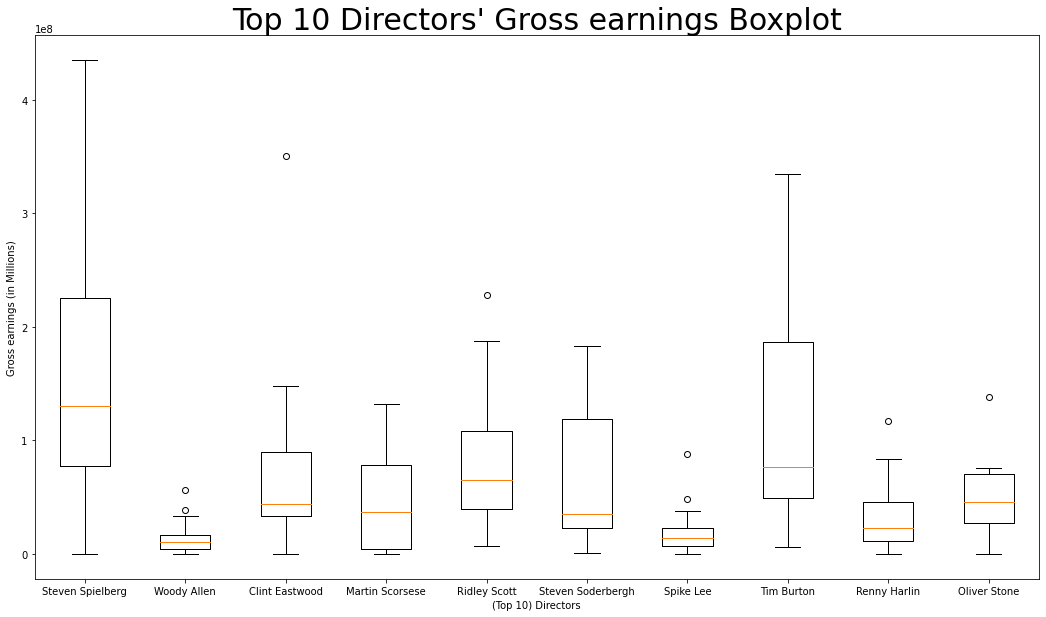

In [5]:
# clean the data first to only include data that has a director name
cond = data["director_name"] != "0"

# set it to cleaned_data variable
cleaned_data = data[cond]

# to get the top 10 directors, we will group the cleaned data by the director name
# use the size() method to get the total number of row count for the group, which is the director name
# use the sort_values() method to sort the most movies directed in descending order and slice to only get the top 10
top_10_directors = cleaned_data.groupby('director_name').size().sort_values(ascending=False)[:10]

# turn the series into a dataframe
# prints the dataframe containing the top 10 directors with the number of movies directed in descending order
top_10_directors_df = pd.DataFrame(top_10_directors, columns=['num_movies']).reset_index()
print("Top 10 Directors with most movies directed")
display(top_10_directors_df)

# dictionary to contain the director name as key, and a list of their gross values for their movies as values
director_gross = {}

# for loop to store the gross values as a list per director_name key
for i in top_10_directors_df['director_name']:
    director_gross[i] = data[data['director_name'] == i]['gross'].tolist()

# creates figure of the boxplot
fig = plt.figure(figsize=(18,10))

# plot the boxplot using the gross values in the dictionary
plt.boxplot(director_gross.values())

# sets the tick location and labels of the x-axis for boxplots
# pass in the list of director names to label per boxplot
plt.xticks(np.arange(1,11), director_gross.keys())

# other details to add in the graph
# labels on x and y axis
# adds title for the graph
plt.xlabel('(Top 10) Directors')
plt.ylabel('Gross earnings (in Millions)')
plt.title('Top 10 Directors\' Gross earnings Boxplot', fontsize=30)

# shows the boxplot
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

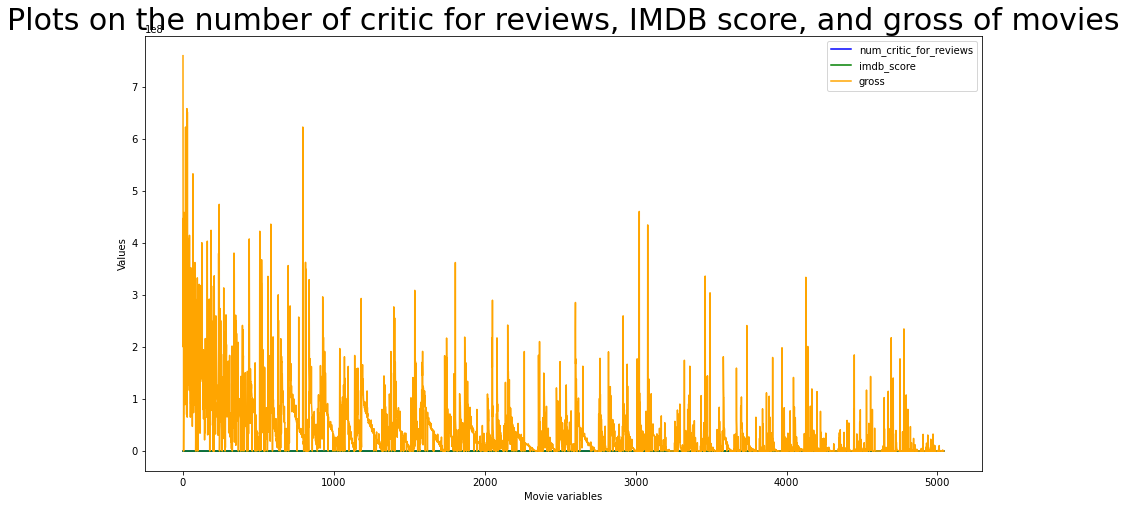

In [6]:
# movie variables
num_critic_for_reviews = data['num_critic_for_reviews']
imdb_score = data['imdb_score']
gross = data['gross']

# plot the movie variables in one graph
fig = plt.figure(figsize=(15,8))
plt.plot(num_critic_for_reviews, color='blue', label='num_critic_for_reviews')
plt.plot(imdb_score, color='green', label='imdb_score')
plt.plot(gross, color='orange', label='gross')

# label the x and y axes
plt.xlabel('Movie variables')
plt.ylabel('Values')

# Add title for the graph
plt.title("Plots on the number of critic for reviews, IMDB score, and gross of movies", fontsize=30)

# show legend of movie variables colors
plt.legend()

# show the graph
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
# create a sales column where the value of gross is subtracted to the budget value 
data['sales'] = data['gross']-data['budget']

# to check whether sales column is now part of the data dataframe, we will check the data
# show the sales column
data[['sales']]


,sales
0,523505847.0
1,9404152.0
2,-44925825.0
3,198130642.0
4,0.0
...,...
5039,0.0
5040,-1400.0
5041,10443.0
5042,84122.0


## Which directors garnered the most total sales?

In [8]:
# group the directors, calculate their total sales, and sort by descending order
most_total_sales = data.groupby('director_name')['sales'].sum().sort_values(ascending=False).reset_index(name='total_sales')

# format total sales to show the length of total_sales variable with only 2 decimal places using map method
most_total_sales['total_sales'] = most_total_sales['total_sales'].map('{:.2f}'.format)

print("Top 5 Directors who garnered the most total sales")

# shows the top 5 directors who garnered the most total sales
most_total_sales.head(5)

Top 5 Directors who garnered the most total sales


,director_name,total_sales
0,Steven Spielberg,2451332231.00
1,George Lucas,1386641480.00
2,James Cameron,1199625910.00
3,Joss Whedon,1000886628.00
4,Chris Columbus,941707624.00


## Plot sales and average likes as a scatterplot. Fit it with a line.

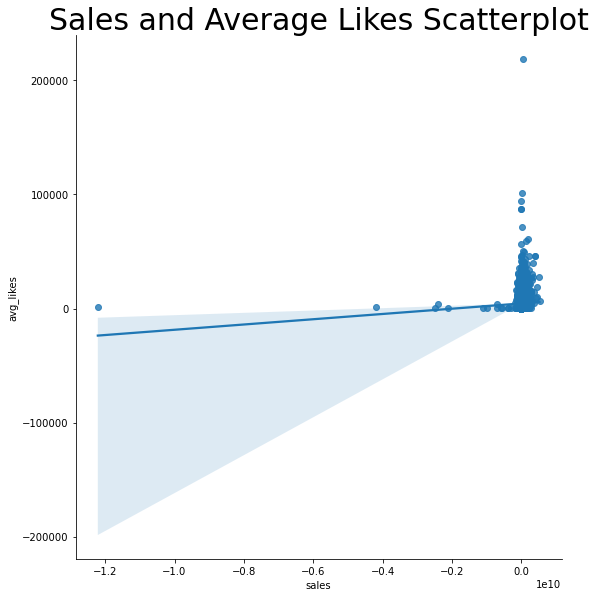

In [9]:
# find columns that contain the string 'like'
with_like = data.columns.str.contains('like', case=False)
data_col_with_like = data.columns[with_like]

# gets the average likes per column where axis = 1
data['avg_likes'] = data[data_col_with_like].mean(axis=1)

# seaborn's lmplot() shows scatter plot with regression on sales and avg_likes
sns.lmplot(x='sales', y='avg_likes', data=data, height=8)
plt.title("Sales and Average Likes Scatterplot", fontsize=30)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

Top genre is: Comedy


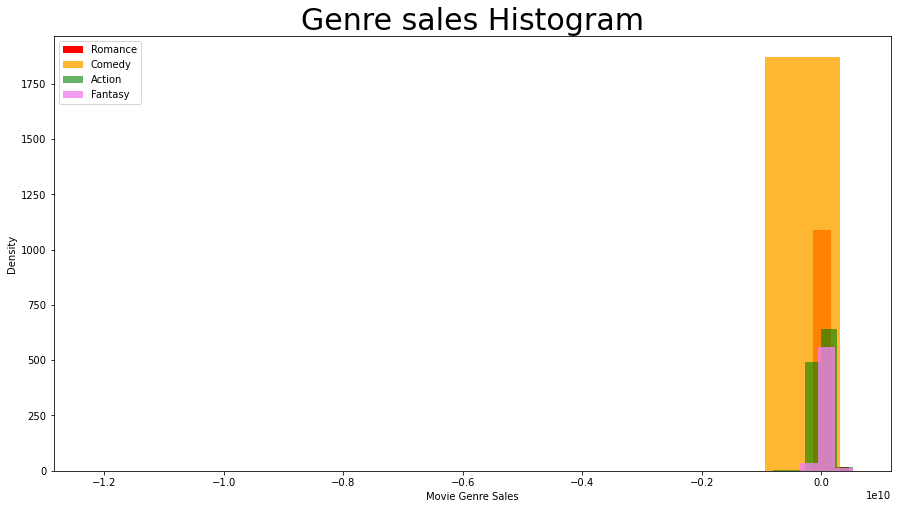

In [10]:
# sales of genre variables
romance_sales = data[data['genres'].str.contains('Romance')]['sales']
comedy_sales = data[data['genres'].str.contains('Comedy')]['sales']
action_sales = data[data['genres'].str.contains('Action')]['sales']
fantasy_sales = data[data['genres'].str.contains('Fantasy')]['sales']

# create a dataframe with the genre and total sales column
# sort the genre in descending to determine the genre that is the most profitable
genre_list = [['Romance', romance_sales.sum()], ['Comedy', comedy_sales.sum()], ['Action', action_sales.sum()], ['Fantasy', fantasy_sales.sum()]]
genre_df = pd.DataFrame(genre_list, columns = ['Genre', 'Sales']).sort_values(by='Sales', ascending=False).reset_index()

# prints the top genre
print("Top genre is: {}".format(genre_df['Genre'][0]))

# building histogram
fig = plt.figure(figsize=(15,8))
plt.hist(romance_sales, color='red', label='Romance')
plt.hist(comedy_sales, color='orange', label='Comedy', alpha=0.8)
plt.hist(action_sales, color='green', label='Action', alpha=0.6)
plt.hist(fantasy_sales, color='violet', label='Fantasy', alpha=0.8)

# include other details of graph
plt.xlabel('Movie Genre Sales')
plt.ylabel('Density')
plt.title('Genre sales Histogram', fontsize=30)
plt.legend()

# show graph
plt.show()


## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [11]:
# include axis=1 in mean method to get the mean values of the columns
data["average_actor_likes"] = data[["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]].mean(axis=1)

# average_actor_likes can be found at the rightmost column
# show that the average_actor_likes is now part of dataframe
data[["average_actor_likes"]]

,average_actor_likes
0,930.333333
1,15333.333333
2,3851.333333
3,24333.333333
4,47.666667
...,...
5039,584.333333
5040,0.000000
5041,718.000000
5042,41.666667


## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,avg_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [13]:
# select columns that have types int or float
int_float_cols = df.select_dtypes(include=['int64', 'float64']).columns

# loop through each numeric column and perform normalization
for i in int_float_cols:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

# show normalized numeric columns
df[int_float_cols]

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,avg_likes,average_actor_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.027062,0.002676
5040,0.999405,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000012,0.000000
5041,0.999603,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003963,0.003289
5042,0.999802,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000579,0.000191
